# Principal Component Analysis

This challenge will help you gain intuition on how a **Principal Component Analysis** works.  

## 1) Generate Data

We want a dataset with **100 observations** and **2 correlated features**

👇 Run the cell below to generate your data  
💡 Notice the correlation between your features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset with 100 observations and 2 correlated features.
seed = np.random.RandomState(42)
feature_1 = seed.normal(5, 1, 100)
feature_2 = .7 * feature_1 + seed.normal(0, .5, 100)
X = np.array([feature_1, feature_2]).T
X = pd.DataFrame(X)

X.corr().round(3)

,0,1
0,1.00,0.77
1,0.77,1.00


❓ Make a scatter plot of your two features against each other

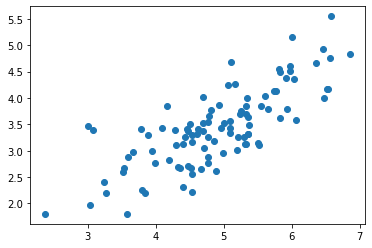

In [5]:
plt.scatter(X[0], X[1])

☝️ You can see the positive correlation between the features  

Our observations are packed along a single line, it is not easy to spot differences between them

💡 PCA will help us find the directions that cancel this correlation

## 2) Principal Components

👉 Import `PCA` from `sklearn` and initiate a model with `n_components=2`

❓Fit it on your `X`, and assign it to `pca`

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(X)

PCA(n_components=2)

Let's focus on two objects in that `PCA`: 

`pca.components_`: it's a set of eigenvectors which point to the directions where the variance is maximally explained: the **directions of maximum variance**.

`pca.explained_variance_`:  $\frac{Var(Principal\; Component)}{Var(X)}$, given by the corresponding L2 norm of these eigenvectors.

In [10]:
pca.components_

array([[-0.79286897, -0.60939216],
       [-0.60939216,  0.79286897]])

In [11]:
pca.explained_variance_

array([1.2231014 , 0.15046893])

👇 Run the cell below to visualize your two Principal Components

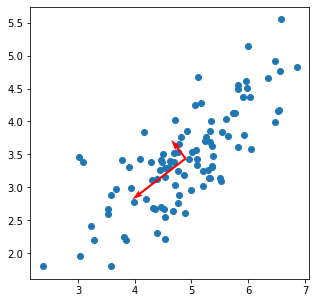

In [12]:
plt.figure(figsize=(5,5))

plt.scatter(X[0], X[1])

for (length, vector) in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length) # Square root of their lenghts to compare same "units"
    plt.quiver(*X.mean(axis=0), *v, units='xy', scale=1, color='r')

The length of the vector is a measure of the standard deviation of the data when projected onto that axis!

We can then use those directions to "explain" most of our observations behaviour - most of the distinction between observations happens along thoses axis. 

## 3) Apply PCA

We can use these components to project every sample of our dataset onto the directions of maximum variance.

 ❓ Use the `transform` method of your `pca` on `X` and store the result in `X_transformed`  
 ❓ Plot your projected features in `X_transformed`against one another.  
 ❓ Compute the correlation between your transformed features in `X_transformed`

In [13]:
X_transformed = pca.transform(X)

In [15]:
X_transformed.shape

(100, 2)

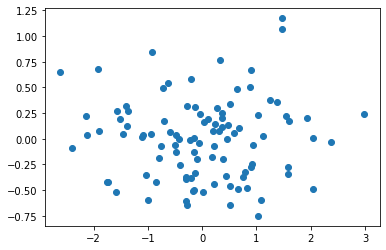

In [16]:
plt.scatter(X_transformed[:,0], X_transformed[:,1])

In [20]:
X_transformed.T.shape

(2, 100)

In [24]:
X_transformed.T.round(3)

array([[-0.294,  0.177, -0.805, -1.733,  0.215,  0.043, -2.62 , -1.109,
         0.374, -0.759,  1.03 ,  0.456, -0.433,  1.463,  2.042,  0.474,
         1.126, -0.147,  0.639,  1.373, -2.148,  0.433, -0.63 ,  2.045,
         0.365, -0.923,  1.586, -0.405,  0.582,  0.389,  1.086, -2.399,
         0.22 ,  1.026, -0.843,  0.897, -0.136,  2.368,  1.252,  0.015,
        -1.09 , -0.727,  0.511,  0.191,  1.604,  0.52 ,  0.819, -1.007,
        -0.698,  1.94 , -0.591,  0.244,  0.913, -0.937, -1.466, -1.038,
         0.335,  0.113, -0.161, -1.51 ,  0.761, -0.133,  0.876,  1.589,
        -1.404, -1.899, -0.283, -1.922, -0.486,  0.897, -0.29 , -1.747,
        -0.053, -2.132,  2.99 , -1.374, -0.23 , -0.198, -0.151,  1.475,
        -0.043, -0.294, -1.596,  0.365,  0.934,  0.274, -1.38 , -0.499,
         0.784, -0.284, -0.102, -1.562,  0.671,  0.659,  0.306,  1.547,
        -0.212, -0.485, -0.144,  0.514],
       [-0.603, -0.174, -0.186, -0.415, -0.066,  0.158,  0.647,  0.013,
         0.113, -0.074,

In [21]:
np.corrcoef(X_transformed.T).round(3)

array([[1., 0.],
       [0., 1.]])

☝️ There is no correlation at all between your transformed features.  

This makes it easier to study the behaviour between observations since they are no longer packed along a single line.

🏁 **Don't forget to push your notebook.**  

Proceed with the challenges of the day and come back here if you have time 😉

## 4 - Optional) With a little help from Scaling

Remember that the `projections` obtained with the `PCA` is nothing more than the dot product of your initial `X` and your transposed components.  

👉 Compute your projected values manually by performing the dot product: $X.PC^T$.  

❓ Use `np.allclose`, to check that your `X_transformed` is equal to your dot product $X.PC^T$.

In [ ]:
np.dot(X, )

In [25]:
np.allclose(X_transformed)

TypeError: _allclose_dispatcher() missing 1 required positional argument: 'b'

It's not equal 😱  

When the `PCA` of `sklearn` applies the reduction, it does so on a `X` that is, *centered*, but not *scaled*.

This means that `PCA().transform(X)` is actually equivalent to `np.dot(X - X.mean(axis=0), PC)`

In [ ]:
np.allclose(X_transformed, np.dot(X - X.mean(axis=0), PC))

That is why when using a `PCA` we often recommend to scale, more precisely standardize, your data first so that they are already centered  
This way, using `PCA` or dot product will be equivalent